# 图像的基本操作

![title](img.png)

#OpenCV官方中文文档 http://www.woshicver.com/
#OpenCV 官方文档 https://docs.opencv.org/3.4.2/index.html
#OpenCv-Python文档 https://docs.opencv.org/3.4.2/d6/d00/tutorial_py_root.html

#cv.IMREAD_COLOR： 加载彩色图像。任何图像的透明度都会被忽视。它是默认标志。
#cv.IMREAD_GRAYSCALE：以灰度模式加载图像
#cv.IMREAD_UNCHANGED：加载图像，包括alpha通道

# OpenCV安装
## pip3 install opencv-contrib-python
## pip3 install opency-python

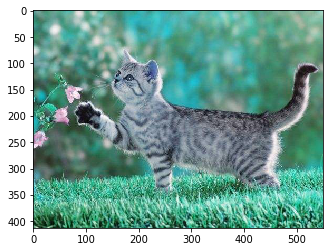

In [3]:
import cv2  #opencv 读取进来为BGR格式
import matplotlib.pyplot as plt
import numpy as np
#一个魔法指令，不需要采用plt.show()显示图像
%matplotlib inline   

img = cv2.imread('images/cat.jpg')

# OpenCV读取的图片从BGR转换为RGB
b, g, r =cv2.split(img)

img2 = cv2.merge([r,g,b])

#img2=img[: , : , : : -1]


# matplotlib显示
plt.imshow(img)
#plt.show()
#print(img)

#opencv显示图像

#cv2.imshow('cat',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [2]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

cv_show('cat',img)

In [3]:
img.shape  #图像尺寸

(413, 550, 3)

In [4]:
#img_gray = cv2.imread('images/cat.jpg',cv2.IMREAD_GRAYSCALE)  #转化为灰度图像

#img_gray​cv2.IMREAD_GRAYSCALE

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray.shape

#plt.imshow(img_gray)
cv_show('mycat',img_gray)

In [5]:
img_gray

array([[148, 148, 148, ..., 202, 203, 203],
       [147, 146, 146, ..., 202, 204, 204],
       [145, 145, 144, ..., 203, 205, 206],
       ...,
       [173, 165, 161, ...,  88,  95, 134],
       [168, 158, 152, ..., 108, 108, 126],
       [165, 155, 141, ..., 139, 127, 112]], dtype=uint8)

In [6]:
img_gray.shape

(413, 550)

In [7]:
img.size   #图像像素个数

681450

In [8]:
img_gray.size

227150

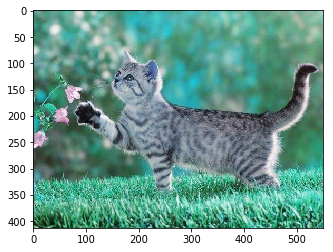

In [9]:
#cv2.imwrite('mycat.png',img)

mycat = cv2.imread('mycat.png')
plt.imshow(mycat)

In [10]:
type(img_gray)



numpy.ndarray

In [15]:
img.dtype      #数据类型

dtype('uint8')

#  读取视频
+ 学习读取视频，显示视频和保存视频。
+ 学习从相机捕捉并显示它。
+ 你将学习以下功能：cv.VideoCapture()，cv.VideoWriter()

In [ ]:
cap = cv2.VideoCapture('videos/Siri.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    # 如果正确读取帧，ret为True
    if not ret:
        print("can not read this video, Exit...")
        break
    
    img_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', img_gray)
    #if cv2.waitKey(100)& 0xFF ==27:
#         break
    if cv2.waitKey(100)== ord('q'):

        cap.release()
        cv2.destroyAllWindows()
    

In [3]:
### 截取图像的部分
img = cv2.imread('images/dog.jpg')

img2 = img[0:100,0:120]

#cv_show('original',img)
#cv_show('ROI',img2)

In [6]:
cur_img = img.copy()
cur_img[:,:,0]=0
cur_img[:,:,1]=0
cv_show('R channel',cur_img)   #只保留R通道

In [7]:
cur_img = img.copy()
cur_img[:,:,0]=0
cur_img[:,:,2]=0
cv_show('G channel',cur_img)   #只保留G通道

In [8]:
cur_img = img.copy()
cur_img[:,:,1]=0
cur_img[:,:,2]=0
cv_show('G channel',cur_img)   #只保留B通道

# 边界填充
如果要在图像周围创建边框（如相框），则可以使用cv.copyMakeBorder()。但是它在卷积运算，零填充等方面有更多应用。此函数采用以下参数：

- src - 输入图像

- top，bottom，left，right 边界宽度（以相应方向上的像素数为单位）

- borderType - 定义要添加哪种边框的标志。它可以是以下类型：

1. cv.BORDER_CONSTANT - 添加恒定的彩色边框。该值应作为下一个参数给出。
2. cv.BORDER_REFLECT - 边框将是边框元素的镜像，如下所示： fedcba | abcdefgh | hgfedcb
3. cv.BORDER_REFLECT_101或 cv.BORDER_DEFAULT与上述相同，但略有变化，例如： gfedcb | abcdefgh | gfedcba
4. cv.BORDER_REPLICATE最后一个元素被复制，像这样： aaaaaa | abcdefgh | hhhhhhh
5. cv.BORDER_WRAP难以解释，它看起来像这样： cdefgh | abcdefgh | abcdefg
value -边框的颜色，如果边框类型为cv.BORDER_CONSTANT

(<matplotlib.axes._subplots.AxesSubplot at 0x218c7aaf9e8>,
 Text(0.5,1,'constant'))

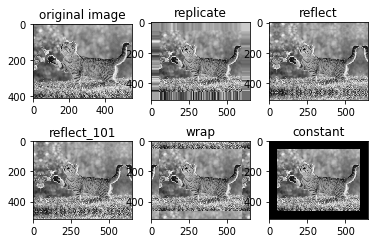

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img_cat = cv2.imread('images/cat.jpg',cv2.IMREAD_GRAYSCALE)
#img_cat=cv2.imread('images/cat.jpg')

top_size,down_size,left_size,right_size=(50,50,50,50)

#plt.imshow(img_cat)
#cv_show('cat',img_cat)
replicate = cv2.copyMakeBorder(img_cat,top_size,down_size,left_size,right_size,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img_cat,top_size,down_size,left_size,right_size,cv2.BORDER_REFLECT)
reflect_101 = cv2.copyMakeBorder(img_cat,top_size,down_size,left_size,right_size,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img_cat,top_size,down_size,left_size,right_size,cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img_cat,top_size,down_size,left_size,right_size,cv2.BORDER_CONSTANT,value=0)

# 显示
plt.subplot(2,3,1),plt.imshow(img_cat,'gray'),plt.title('original image')
plt.subplot(2,3,2),plt.imshow(replicate,'gray'),plt.title('replicate')
plt.subplot(2,3,3),plt.imshow(reflect,'gray'),plt.title('reflect')
plt.subplot(2,3,4),plt.imshow(reflect_101,'gray'),plt.title('reflect_101')
plt.subplot(2,3,5),plt.imshow(wrap,'gray'),plt.title('wrap')
plt.subplot(2,3,6),plt.imshow(constant,'gray'),plt.title('constant')


# 数值计算

In [22]:
img_cat = cv2.imread('images/cat.jpg')
img_dog = cv2.imread('images/dog.jpg')

img_cat[0:5,0:5,0]

array([[ 93,  93,  97,  99, 105],
       [ 92,  91,  93,  97, 103],
       [ 88,  90,  91,  95,  99],
       [ 89,  88,  91,  94,  99],
       [ 88,  88,  89,  91,  96]], dtype=uint8)

In [27]:
img_cat2 = img_cat+10
img_cat2[0:5,0:5,0]

array([[103, 103, 107, 109, 115],
       [102, 101, 103, 107, 113],
       [ 98, 100, 101, 105, 109],
       [ 99,  98, 101, 104, 109],
       [ 98,  98,  99, 101, 106]], dtype=uint8)

In [32]:
# img_cat+img_dog
img_dog[0:5,0:5,0]


array([[48, 33, 22, 23, 25],
       [33, 18,  7,  6, 11],
       [24,  9,  0,  0,  4],
       [31, 16,  5,  7, 12],
       [39, 24, 13, 14, 20]], dtype=uint8)

In [34]:
img_cat = cv2.resize(img_cat,(499,497))  # h,w
img_cat.shape

(497, 499, 3)

In [36]:
(img_cat+img_dog)[0:5,0:5,0]

array([[141, 126, 119, 124, 133],
       [125, 110, 102, 106, 117],
       [114, 100,  93,  97, 108],
       [119, 105,  97, 103, 114],
       [128, 112, 104, 109, 121]], dtype=uint8)

In [37]:
cv2.add(img_cat,img_dog)[0:5,0:5,0]

array([[141, 126, 119, 124, 133],
       [125, 110, 102, 106, 117],
       [114, 100,  93,  97, 108],
       [119, 105,  97, 103, 114],
       [128, 112, 104, 109, 121]], dtype=uint8)

# 图像融合


In [38]:
img_cat = cv2.imread('images/cat.jpg')
img_dog = cv2.imread('images/dog.jpg')

In [39]:
img_cat.shape

(413, 550, 3)

In [40]:
img_dog.shape

(497, 499, 3)

In [41]:
img_cat = cv2.resize(img_cat,(499,497))  # h,w
img_cat.shape

(497, 499, 3)

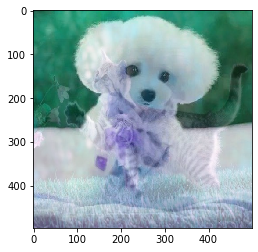

In [42]:
res = cv2.addWeighted(img_cat,0.3,img_dog,0.7,0)
plt.imshow(res)

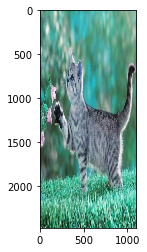

In [24]:
img_cat = cv2.resize(img_cat,(0,0),fx=2,fy=2)
plt.imshow(img_cat)